In [30]:
import numpy as np
import pandas as pd

import io
import bson # this is installed with the pymongo package
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.data import imread

# Categories analysis

In [31]:
categories = pd.read_csv("..\\Data\\category_names.csv")

In [32]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
category_id        5270 non-null int64
category_level1    5270 non-null object
category_level2    5270 non-null object
category_level3    5270 non-null object
dtypes: int64(1), object(3)
memory usage: 164.8+ KB


__<span style="color:green">OK</span> : 5270 rows for all columns, no missing values__

In [33]:
categories.head()

,category_id,category_level1,category_level2,category_level3
0,1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA
1,1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR
2,1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO
3,1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU
4,1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR


In [34]:
categories.groupby(['category_level1','category_level2','category_level3']).count()

category_id
category_level1             category_level2                  category_level3                                                
ABONNEMENT / SERVICES       CARTE PREPAYEE                   CARTE PREPAYEE MULTIMEDIA                                     1
AMENAGEMENT URBAIN - VOIRIE AMENAGEMENT URBAIN               ABRI FUMEUR                                                   1
                                                             ABRI VELO - ABRI MOTO                                         1
                                                             FONTAINE A EAU                                                1
                            SIGNALETIQUE                     PANNEAU D'INFORMATION EXTERIEUR                               1
                            SIGNALISATION ROUTIERE           CONE DE SIGNALISATION - PLOT DE SIGNALISATION                 1
                                                             PANNEAU ROUTIER                                               1
                                                             RUBAN DE SIGNALISATION                                        1
                            VOIRIE                           BLOC PARKING - ARCEAU PARKING                                 1
                                                             POTEAU - POTELET                                              1
ANIMALERIE                  ACCESSOIRE POUR REPAS            ABREUVOIR                                                     1
                                                             AUGE                                                          1
                                                             BIBERON                                                       1
                                                             DISTRIBUTEUR D'ALIMENT                                        1
                                                             FONTAINE A EAU                                                1
                                                             GAMELLE - ECUELLE - ACCESSOIRE DE GAMELLE - ACC...            1
                                                             KIT ACCESSOIRE POUR REPAS                                     1
                                                             MANGEOIRE - TREMIE                                            1
                                                             PINCE DE NOURRISSAGE - PELLE DE NOURRISSAGE - C...            1
                                                             RATELIER                                                      1
                                                             TRANSPORT DES ALIMENTS - BOITE DE RANGEMENT - P...            1
                            ALIMENTATION                     ALIMENT MINERAL - COQUILLE - SEL A LECHER - PIE...            1
                                                             ALIMENT PELLICULE - COMPRIME ALIMENTAIRE                      1
                                                             BOITE D'ALIMENTATION - PATEE D'ALIMENTATION - N...            1
                                                             BOULE DE GRAISSE                                              1
                                                             CROQUETTE - NOURRITURE SECHE                                  1
                                                             EXTRUDE - EN GRANULE                                          1
                                                             FLOCONS - MASH - MUESLI                                       1
                                                             FOIN - FOURRAGE                                               1
                                                             FRIANDISE                                                     1
...                                                                                                              

In [35]:
groupedCategories = categories.groupby(['category_level1','category_level2'])['category_level3']

In [36]:
groupedCategoriesCount = groupedCategories.count()
print("sum = %f" % groupedCategoriesCount.sum())
print("mean = %f" % groupedCategoriesCount.mean())
print("median = %f" % groupedCategoriesCount.median())
print("std = %f" % groupedCategoriesCount.std())



sum = 5270.000000
mean = 10.843621
median = 8.000000
std = 12.988029


# Train example analysis

In [37]:
train_example = bson.decode_file_iter(open('..\\data\\train_example.bson', 'rb'))

df_train_example = pd.DataFrame(columns=('product_id', 'category_id', 'img', 'img_index'))

offsetIndex = 0
for c, d in enumerate(train_example):
    
    for index_image, image in enumerate(d['imgs']):
        
        offsetIndex = offsetIndex + 1   
        picture = imread(io.BytesIO(image['picture']))    
        df_train_example.loc[offsetIndex] = [d['_id'],d['category_id'], picture, index_image ]
      
df_train_example.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 1 to 110
Data columns (total 4 columns):
product_id     110 non-null object
category_id    110 non-null object
img            110 non-null object
img_index      110 non-null object
dtypes: object(4)
memory usage: 4.3+ KB


In [38]:
df_train_example.head()

,product_id,category_id,img,img_index
1,0,1000010653,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,1,1000010653,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,2,1000004079,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",0
4,3,1000004141,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
5,4,1000015539,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0


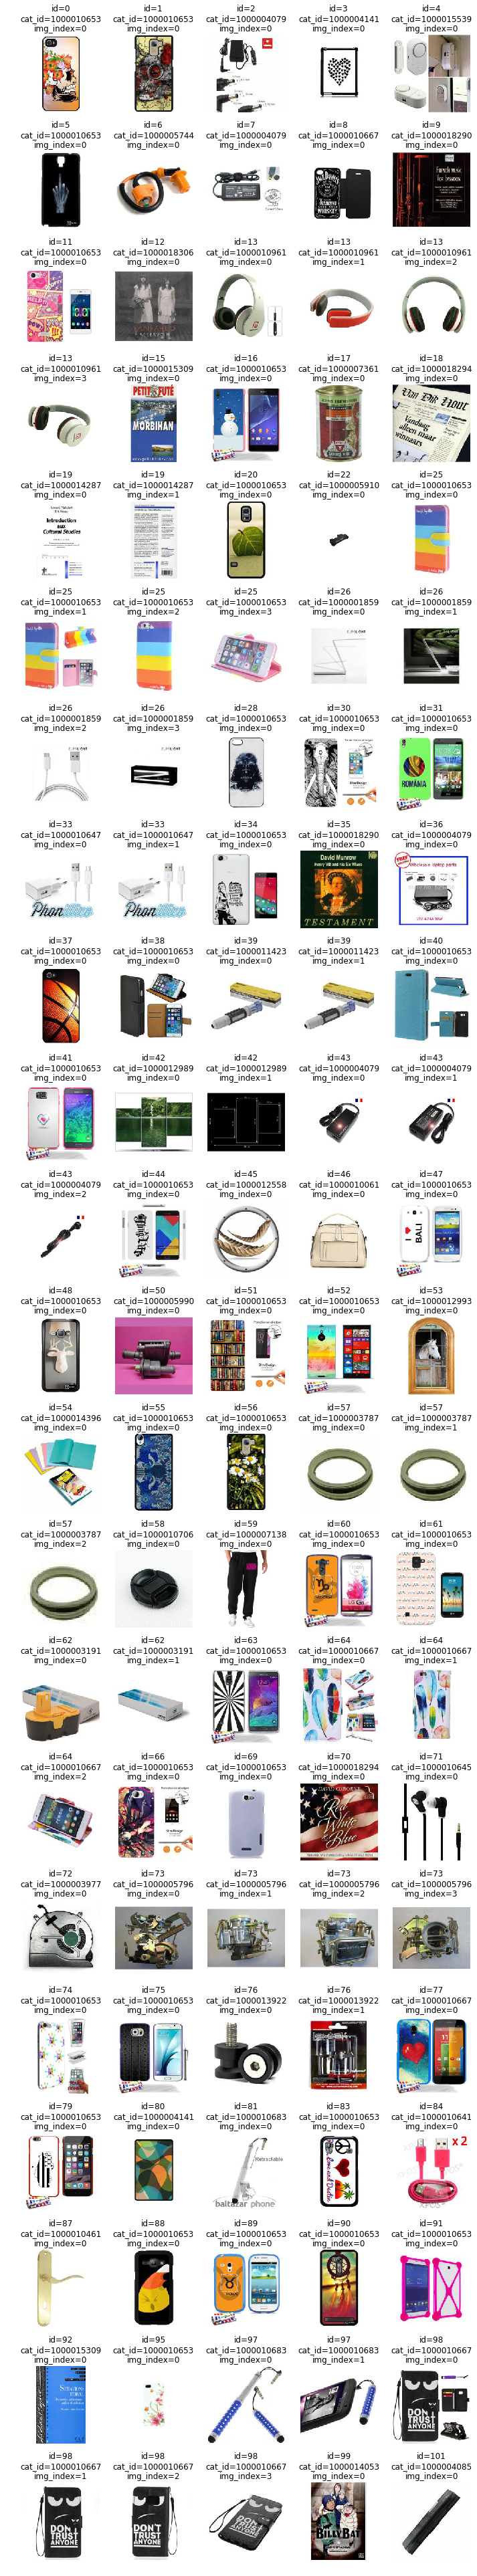

In [42]:
nbPicPerRows = 5
rest = df_train_example.shape[0] % nbPicPerRows
nbRows = df_train_example.shape[0] // nbPicPerRows
if(rest > 0):
    nbRows = nbRows +1

plt.figure(figsize=(12, 70))


for index, row in df_train_example.iterrows():
    
    plt.subplot(nbRows, nbPicPerRows, index)
    plt.axis("off")
    plt.title("id=" + str(row["product_id"]) +"\ncat_id=" + str(row["category_id"]) + "\nimg_index=" + str(row["img_index"]))
    plt.imshow(row["img"])

plt.savefig("GeneratedFiles\\train_example.png")
plt.show()
